# 📊 Customer Churn Prediction - Modeling

In this notebook, we build, train, evaluate, and compare machine learning models for predicting customer churn.


In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt

In [43]:
x_train = pd.read_csv(r'C:\Users\raich\Desktop\project2\-Customer-Churn-Demand-Prediction-Using-ML\Data\x_train.csv')  # Feature training data
x_test = pd.read_csv(r'C:\Users\raich\Desktop\project2\-Customer-Churn-Demand-Prediction-Using-ML\Data\x_test.csv')      # Feature testing data
y_train = pd.read_csv(r'C:\Users\raich\Desktop\project2\-Customer-Churn-Demand-Prediction-Using-ML\Data\y_train.csv')  # target training data
y_test = pd.read_csv(r'C:\Users\raich\Desktop\project2\-Customer-Churn-Demand-Prediction-Using-ML\Data\y_test.csv')      # target testing data

In [44]:
model={'LogisticRegression':LogisticRegression(max_iter=200),
       'RandomForestClassifier':RandomForestClassifier(random_state=42),
       'GradientBoostingClassifier':GradientBoostingClassifier(random_state=42),
       'SVC':SVC(random_state=42),
       'xgboost':XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
       'lightgbm':LGBMClassifier()

       }

In [47]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'accuracy_score of {name} is :{accuracy_score(y_test,y_pred)}')

c:\Users\raich\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\raich\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\raich\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


accuracy_score of LogisticRegression is :0.8156590683845392
accuracy_score of RandomForest is :0.8136769078295342


c:\Users\raich\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score of GradientBoosting is :0.8126858275520317


c:\Users\raich\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score of SVC is :0.7522299306243806
accuracy_score of XGBoost is :0.7978196233894945
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1086, number of negative: 2947
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 4033, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269278 -> initscore=-0.998286
[LightGBM] [Info] Start training from score -0.998286
accuracy_score of LightGBM is :0.800792864222002


c:\Users\raich\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\raich\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


|  Model                  | Accuracy Score |
| ------------------------- | -------------- |
| Logistic Regression       | **81.57%**     |
| Random Forest             | **81.37%**     |
| Gradient Boosting         | **81.27%**     |
| Support Vector Classifier | **75.22%**     |
| XGBoost                   | **79.78%**     |
| LightGBM                  | **80.08%**     |

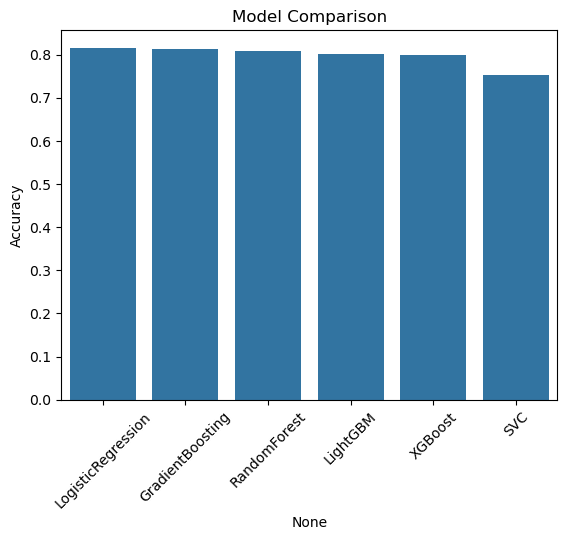

In [46]:
# Collect model scores
results = {}
for name, model in models.items():
    results[name] = accuracy_score(y_test, model.predict(x_test))

# Display comparison
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

sns.barplot(x=results_df.index, y=results_df.Accuracy)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()
